<a href="https://colab.research.google.com/github/Felixwkk/stocks/blob/master/SIA_Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
mykey = 'YOURKEY'
!pip install alpha_vantage

  Created wheel for alpha-vantage: filename=alpha_vantage-2.1.3-cp36-none-any.whl size=14870 sha256=71aa7bedac8e7bd83f9a16b3ada3992aeda50866ff7d95e41833abe0e8c9c2ce
  Stored in directory: /root/.cache/pip/wheels/d4/75/c2/483b0a988fd965b1128c1396a0ffadfb8903bd2bb569220048
Successfully built alpha-vantage


In [0]:
# Singapore Airlines Stock - C6L.SI
import numpy as np
import pandas as pd
import matplotlib
import matplotlib as plt
import datetime
from datetime import timedelta
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators

plt.style.use('fivethirtyeight')
matplotlib.rcParams['figure.figsize'] = (20,10)


In [0]:
ta = TechIndicators(key = mykey, output_format = 'pandas')
ts = TimeSeries(key=mykey, output_format= 'pandas')

SIA = ts.get_daily('C6L.SI', outputsize = 'full')[0]

In [7]:
SIA.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2020-02-11,8.54,8.60,8.51,8.53,1120200.0
2020-02-10,8.50,8.56,8.49,8.51,1697600.0
2020-02-07,8.63,8.73,8.56,8.58,3198400.0
2020-02-06,8.63,8.76,8.63,8.74,2423900.0
2020-02-05,8.50,8.65,8.45,8.59,2166500.0


In [0]:
SIA = SIA = SIA.reindex(index = SIA.index[::-1]) # sort the data from latest to earliest

In [9]:
SIA.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2000-01-03,19.5,20.1,19.0,20.0,1828000.0
2000-01-04,20.0,20.8,20.0,20.6,3436000.0
2000-01-05,19.5,19.8,16.0,19.2,2897000.0
2000-01-06,19.5,19.7,17.7,18.3,3984000.0
2000-01-07,18.5,19.6,18.4,19.3,2704000.0


In [10]:
SIA.columns = ['Open','High','Low','Close','Volume'] # rename the columns
SIA

,Open,High,Low,Close,Volume
date,,,,,
2000-01-03,19.50,20.10,19.00,20.00,1828000.0
2000-01-04,20.00,20.80,20.00,20.60,3436000.0
2000-01-05,19.50,19.80,16.00,19.20,2897000.0
2000-01-06,19.50,19.70,17.70,18.30,3984000.0
2000-01-07,18.50,19.60,18.40,19.30,2704000.0
...,...,...,...,...,...
2020-02-05,8.50,8.65,8.45,8.59,2166500.0
2020-02-06,8.63,8.76,8.63,8.74,2423900.0
2020-02-07,8.63,8.73,8.56,8.58,3198400.0


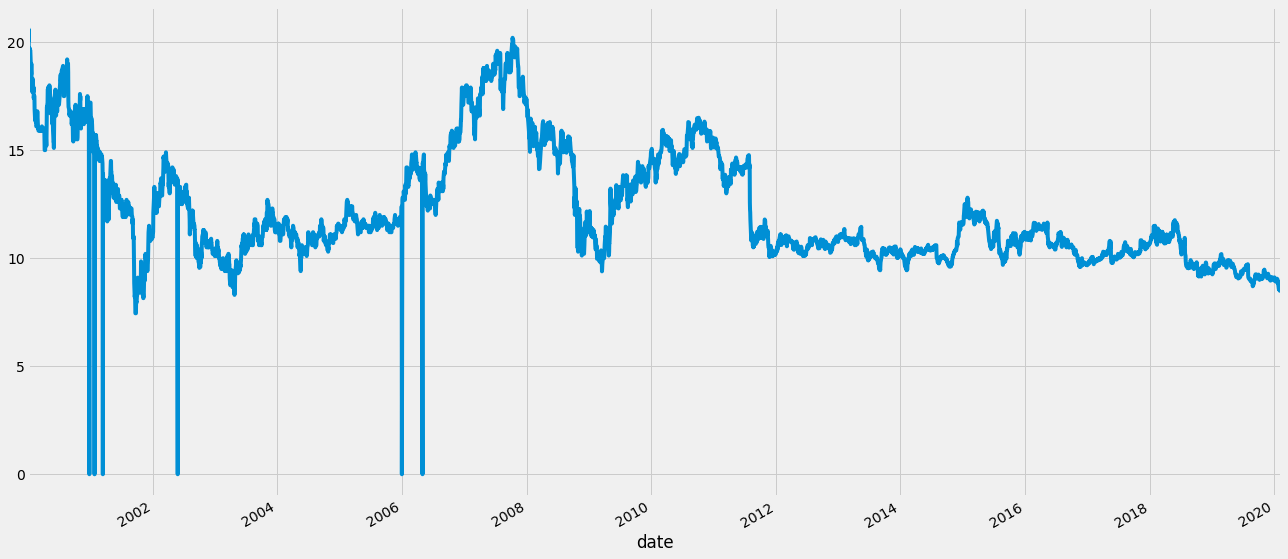

In [11]:
SIA['Close'].plot()

In [0]:
SIA = SIA[SIA['Close']!=0] # remove the zeros

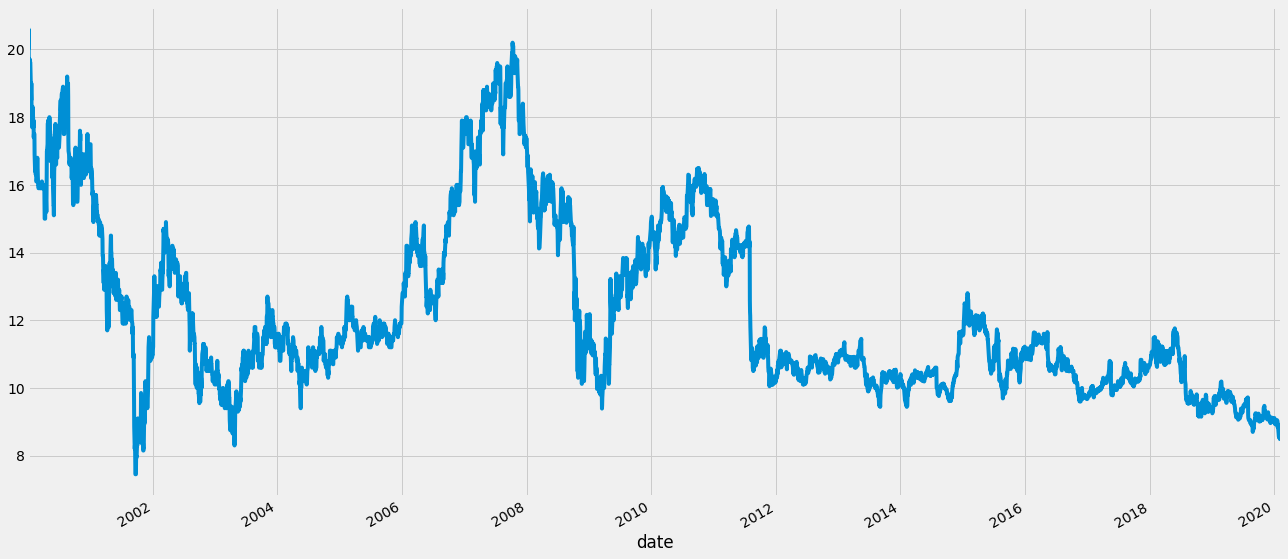

In [13]:
SIA['Close'].plot()

The golden cross strategy is when the 50 SMA crosses above the 200 SMA. Traders and investors take that as a buy signal. Vice versa, when the 50 SMA crosses below the 200 SMA, that is a bearish signal.



In [15]:

SIA['50 SMA'] = ta.get_sma('C6L.SI', interval='daily', time_period=50)[0]
SIA['200 SMA'] = ta.get_sma('C6L.SI', interval = 'daily', time_period = 200)[0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


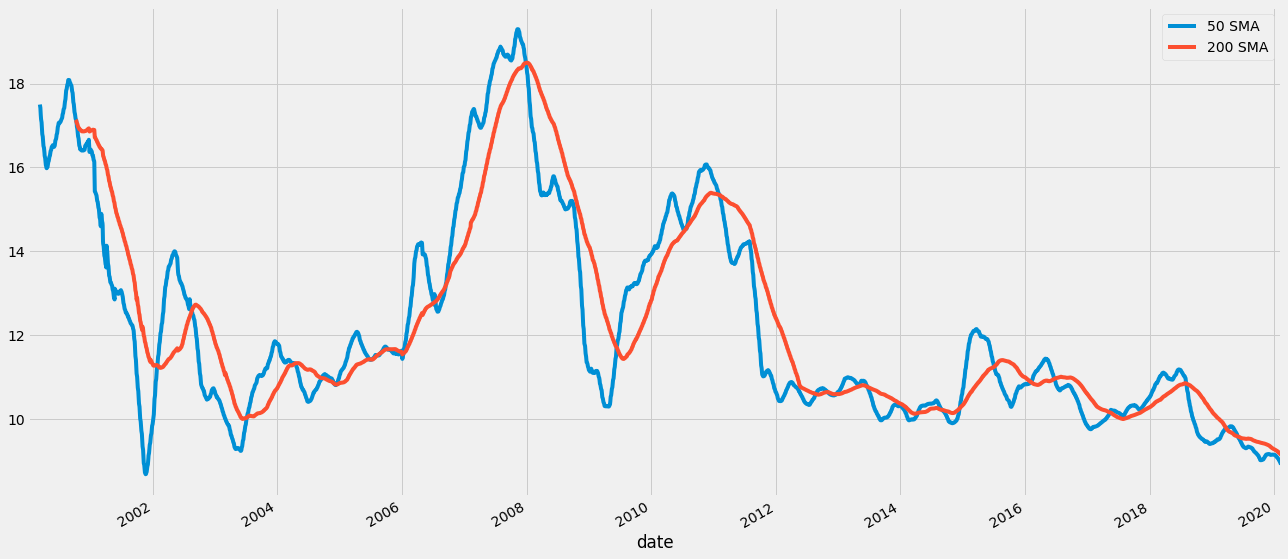

In [16]:
SIA[['50 SMA', '200 SMA']].plot()

new column called Buy. This column would store only either 1 or 0. 1 means we are long and 0 means we are out of the market. The condition for 1 would be exactly the same as the logic described above. The 50 SMA has to be above the 200 SMA. Else, it would be 0. I also added in another condition that says both the 50 and 200 SMA can’t be null values.

In [17]:
SIA['Buy'] = [1 if SIA.loc[n,'50 SMA'] > SIA.loc[n,'200 SMA'] and 
               (SIA.loc[n,'200 SMA'] != 0 and SIA.loc[n, '50 SMA'] != 0)
               else 0 
               for n in SIA.index]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [18]:
SIA.head()

,Open,High,Low,Close,Volume,50 SMA,200 SMA,Buy
date,,,,,,,,
2000-01-03,19.5,20.1,19.0,20.0,1828000.0,NaN,NaN,0
2000-01-04,20.0,20.8,20.0,20.6,3436000.0,NaN,NaN,0
2000-01-05,19.5,19.8,16.0,19.2,2897000.0,NaN,NaN,0
2000-01-06,19.5,19.7,17.7,18.3,3984000.0,NaN,NaN,0
2000-01-07,18.5,19.6,18.4,19.3,2704000.0,NaN,NaN,0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


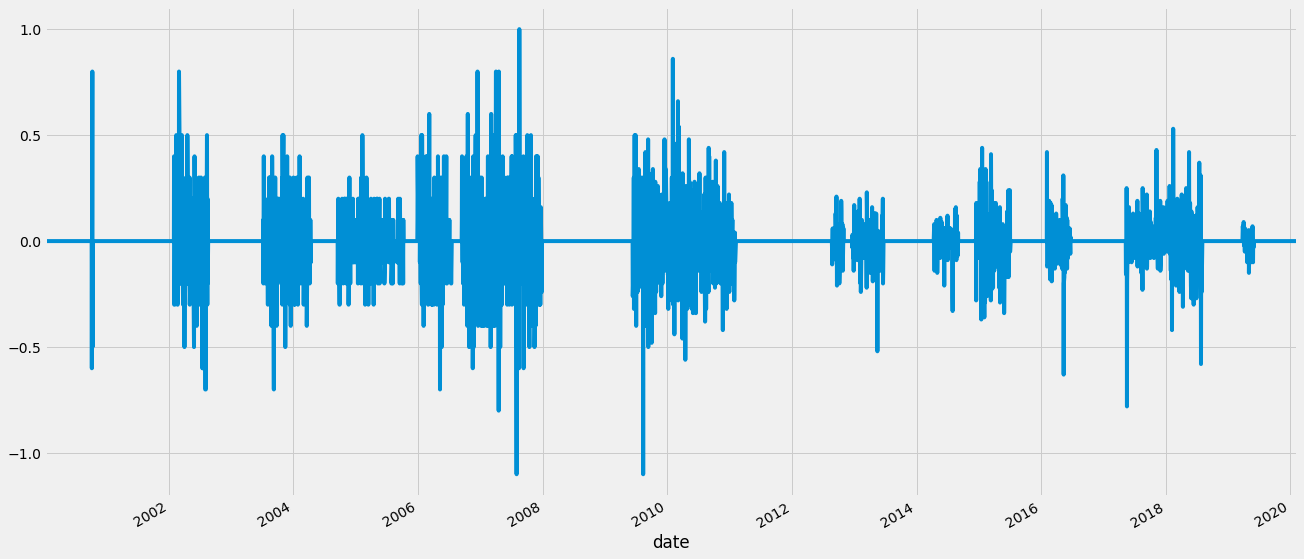

In [20]:
SIA['Price tomorrow'] = SIA['Close'].shift(-1) # getting the price of tomorrow
SIA['Daily profits'] = [SIA.loc[n,'Price tomorrow'] - SIA.loc[n,'Close']
                        if SIA.loc[n,'Buy']== 1 # Buy when condition is 1
                        else 0
                        for n in SIA.index]

SIA['Daily profits'].plot()

In [21]:
SIA['Daily profits'].mean()

-0.00028834837191055363

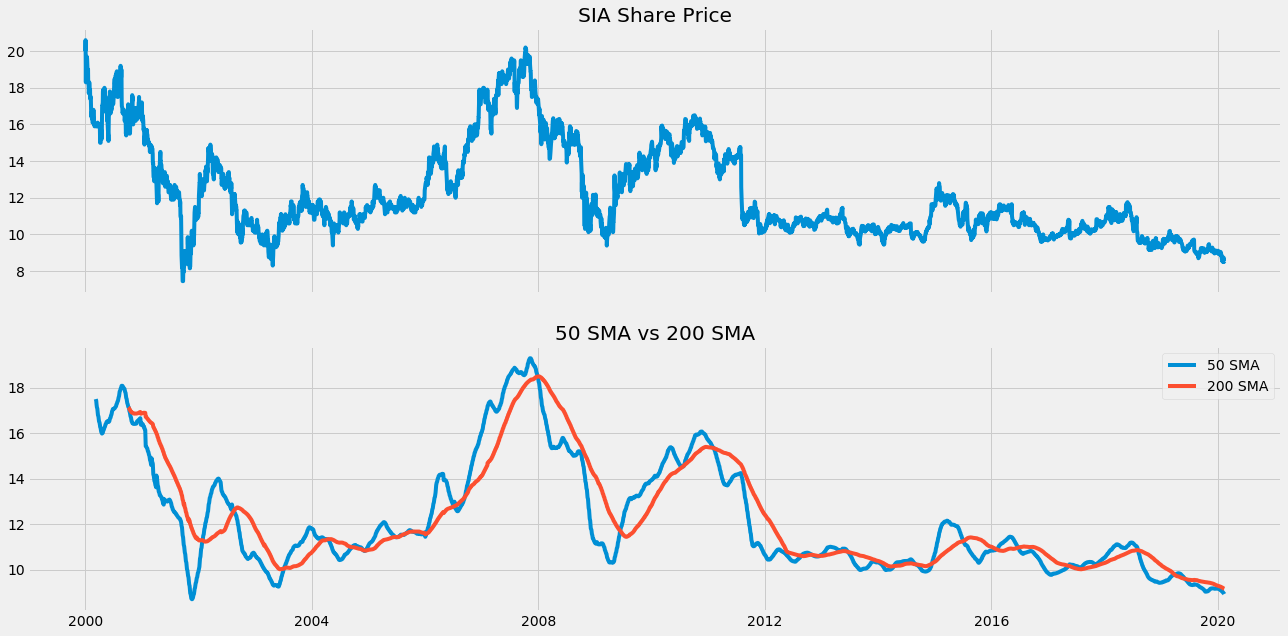

In [22]:
import matplotlib.pyplot as plt
fig, (ax1 , ax2) = plt.subplots(nrows =2, ncols = 1, sharex = True)

ax1.plot(SIA['Close'])
ax1.set_title('SIA Share Price')
ax2.plot(SIA['50 SMA'], label = '50 SMA')
ax2.plot(SIA['200 SMA'], label = '200 SMA')
ax2.set_title('50 SMA vs 200 SMA')
ax2.legend()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Total Profits')

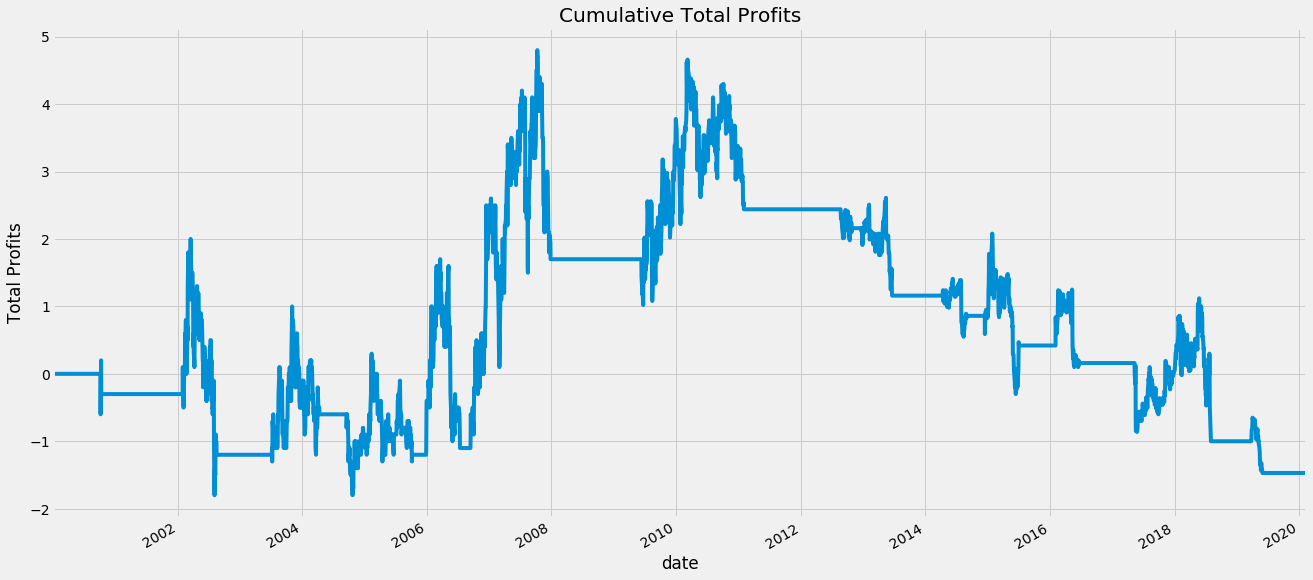

In [23]:
SIA['Total Profits'] = SIA['Daily profits'].cumsum()
SIA['Total Profits'].plot()
plt.title('Cumulative Total Profits')
plt.ylabel('Total Profits')


In [24]:
SIA[SIA['Buy'] == 1 ].tail()

,Open,High,Low,Close,Volume,50 SMA,200 SMA,Buy,Price tomorrow,Daily profits,Total Profits
date,,,,,,,,,,,
2019-05-27,9.19,9.26,9.19,9.24,1002800.0,9.6544,9.6012,1,9.14,-0.10,-1.42
2019-05-28,9.21,9.24,9.14,9.14,2452200.0,9.6404,9.5992,1,9.14,0.00,-1.42
2019-05-29,9.12,9.16,9.10,9.14,1356600.0,9.6272,9.5971,1,9.14,0.00,-1.42
2019-05-30,9.10,9.17,9.10,9.14,1285900.0,9.6134,9.5947,1,9.11,-0.03,-1.45
2019-05-31,9.08,9.14,9.05,9.11,1643600.0,9.5986,9.5925,1,9.09,-0.02,-1.47


commission fees every time you buy and sell. I have also thought of the same question. So I came up with a solution to count the number of times when the buy column switches from 0 to 1 and from 1 to 0.

In [25]:
count = 0
for ytd, tdy in zip(SIA.index, SIA.index[1:]):
  if SIA.loc[tdy, 'Buy'] == 1 and SIA.loc[ytd, 'Buy'] == 0: # entering a position
    count += 1
  elif SIA.loc[tdy, 'Buy'] == 0 and SIA.loc[ytd, 'Buy'] == 1: # closing position
    count += 1

count

40

extract all the indicator values. After which, we are going to concatenate the new values into a new data frame. And finally, remove all the blank and null values.



In [26]:
SIA['RSI'] = ta.get_rsi('C6L.SI', interval = 'daily', time_period = 20)[0]
bbands = ta.get_bbands('C6L.SI', interval = 'daily', time_period = 20)[0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
df = pd.concat([SIA,bbands], axis = 1)
df = df[df['Close'].notnull()]
df = df[df['Real Lower Band'].notnull()]
df = df[df['RSI'].notnull()]

plot the buy and sell positions. So when RSI < 25 and price < lower band, then that would be a green marker spot to buy. Vice versa, when RSI > 75 and price > upper band, that would be a red marker spot to sell.

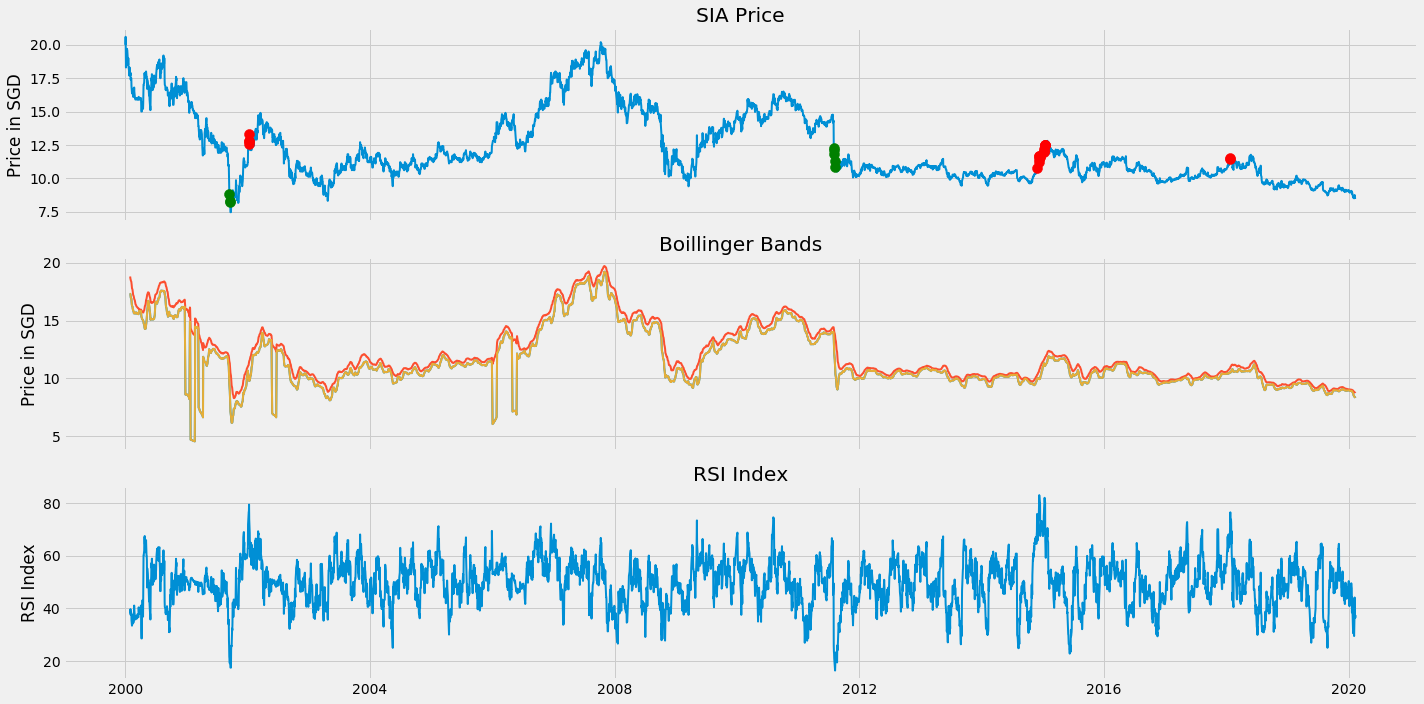

In [28]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, ncols =1, sharex = True)
ax1.plot(SIA['Close'], linewidth = 2)
ax1.set_title('SIA Price')
ax1.set_ylabel('Price in SGD')

for n in df.index:
    if(df.loc[n,'Close'] < df.loc[n, 'Real Lower Band']) and df.loc[n,'RSI'] < 25:
      ax1.scatter(x= n, y =df.loc[n,'Close'],color = 'green', s = 100, zorder = 3)
    elif (df.loc[n,'Close'] > df.loc[n, 'Real Lower Band']) and df.loc[n, 'RSI'] > 75:
      ax1.scatter(x= n, y=df.loc[n,'Close'], color = 'red', s= 100, zorder = 3)

ax2.plot(df[['Real Lower Band', 'Real Middle Band', 'Real Lower Band']], linewidth = 2)
ax2.set_ylabel('Price in SGD')
ax2.set_title('Boillinger Bands')

ax3.plot(df['RSI'],linewidth = 2)
ax3.set_ylabel('RSI Index')
ax3.set_title('RSI Index')

plt.tight_layout()